# Investment Simulator Application
### Please note: This is not investment advice !!!

### Need to create an application which allows the user to provide a ticker symbol, starting amount, monthly investment amount, start date, end end date ranges as input, and the user clicks a generate button, post which there is a chart explaining the growth of investment and total amount across time if the person had invested in the stock or index(ticker)

In [11]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
# Taking user inputs for the investment simulator
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")
# Taking user inputs for monthly investment amounts
monthly_investment_amount = float(input("Enter the monthly investment amount: "))
starting_amount = float(input("Enter the starting amount: "))

In [51]:
# Taking day of investment as input
day_of_investment = int(input("Enter the day of the month for investment (1-31): "))

In [81]:
# taking ticker symbol as input
ticker = input("Enter the ticker symbol (e.g., AAPL for Apple): ")

In [82]:
# Fetching stock data using YahooFinancials
# Extracting for atleast a week before the start date to ensure we have enough data
stock_data = yf.download(ticker, start=pd.to_datetime(start_date) - pd.Timedelta(days=7), end=end_date)
# inspecting the stock data
print(stock_data.head())

C:\Users\kruth\AppData\Local\Temp\ipykernel_6436\1763422918.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=pd.to_datetime(start_date) - pd.Timedelta(days=7), end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open  Volume
Ticker             VGT         VGT         VGT         VGT     VGT
Date                                                              
2020-12-28  344.182526  345.267322  342.361684  345.044546  607600
2020-12-29  341.906403  346.439190  341.247769  346.003333  532800
2020-12-30  342.361664  343.911314  341.741780  343.397986  354500
2020-12-31  342.661896  343.243029  340.056505  342.574730  411000
2021-01-04  336.966766  344.347080  332.356479  344.201805  810100


In [83]:
# Removing multiindex from the dataframe
stock_data.columns = stock_data.columns.droplevel(1)
# Filtering for only the closing price column and rounding it to 2 decimal places
stock_data = stock_data['Close'].round(2)
# After filtering for 'Close', convert to DataFrame
stock_data = stock_data.to_frame()
# Naming the column for clarity
stock_data.columns = ['Close']
# inspecting the stock data after removing multiindex
print(stock_data.head())
print(stock_data.shape)

             Close
Date              
2020-12-28  344.18
2020-12-29  341.91
2020-12-30  342.36
2020-12-31  342.66
2021-01-04  336.97
(1008, 1)


In [84]:
# Creating a continuous date dataset to ensure all dates are represented
# Creating a date range from start_date minus a week to end_date
date_range = pd.date_range(start=pd.to_datetime(start_date) - pd.Timedelta(days=7), end=end_date)
# Reindexing the stock data to include all dates in the range
stock_data = stock_data.reindex(date_range)
# Filling missing values with forward fill method
stock_data.fillna(method='ffill', inplace=True)
# filtering for date range
stock_data = stock_data[(stock_data.index >= start_date) & (stock_data.index <= end_date)]
# Inspecting the stock data after reindexing
print(stock_data.head(10))
print(stock_data.shape)

             Close
2021-01-01  342.66
2021-01-02  342.66
2021-01-03  342.66
2021-01-04  336.97
2021-01-05  339.74
2021-01-06  334.10
2021-01-07  343.61
2021-01-08  346.12
2021-01-09  346.12
2021-01-10  346.12
(1461, 1)


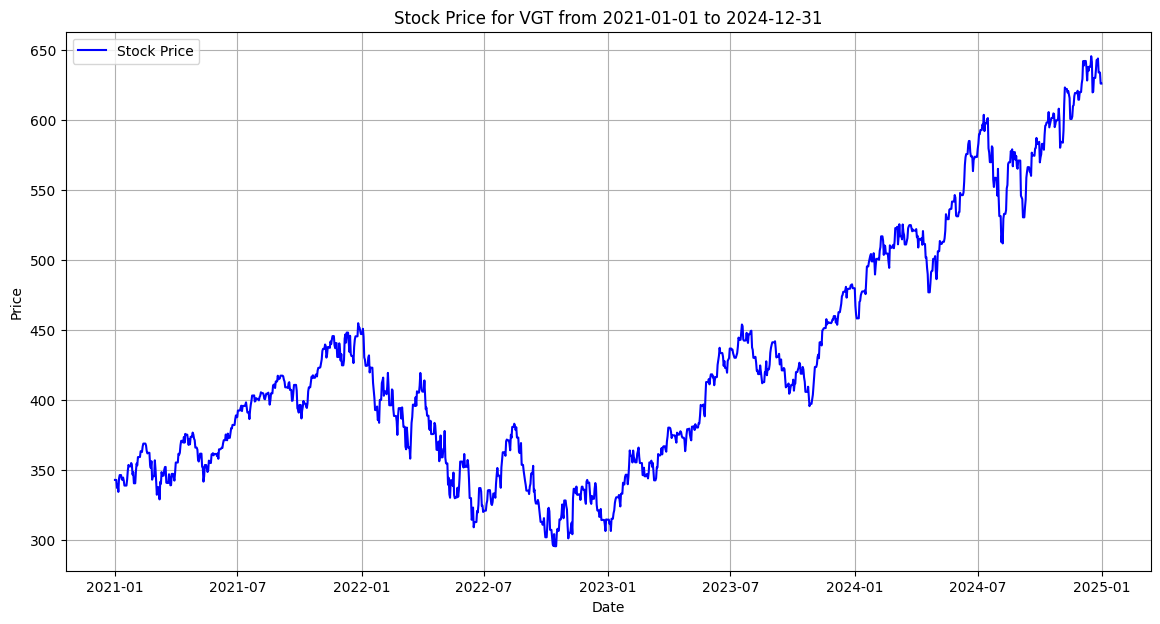

In [85]:
# Visualizing the stock data
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data, label='Stock Price', color='blue')
plt.title(f'Stock Price for {ticker} from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [86]:
# Adding a column for the starting investment amount
stock_data['start_inv_amt'] = starting_amount
# Adding a column mnth_inv_amt to capture monthly investment amount on the investment date
stock_data['mnth_inv_amt'] = 0.0
# Setting the monthly investment amount on the investment days
for date in stock_data.index:
    if date.day == day_of_investment:
        stock_data.at[date, 'mnth_inv_amt'] = monthly_investment_amount

# Adding the starting amount to mnth_inv_amt on the first date
stock_data.at[stock_data.index[0], 'mnth_inv_amt'] += starting_amount

# Inspecting the stock data after adding investment amounts
print(stock_data.head(30))

             Close  start_inv_amt  mnth_inv_amt
2021-01-01  342.66            0.0           0.0
2021-01-02  342.66            0.0           0.0
2021-01-03  342.66            0.0           0.0
2021-01-04  336.97            0.0           0.0
2021-01-05  339.74            0.0           0.0
2021-01-06  334.10            0.0           0.0
2021-01-07  343.61            0.0           0.0
2021-01-08  346.12            0.0           0.0
2021-01-09  346.12            0.0           0.0
2021-01-10  346.12            0.0           0.0
2021-01-11  343.17            0.0           0.0
2021-01-12  342.66            0.0           0.0
2021-01-13  344.38            0.0           0.0
2021-01-14  342.23            0.0           0.0
2021-01-15  338.62            0.0           0.0
2021-01-16  338.62            0.0           0.0
2021-01-17  338.62            0.0           0.0
2021-01-18  338.62            0.0           0.0
2021-01-19  342.85            0.0           0.0
2021-01-20  349.34            0.0       

In [87]:
# Calculating the amount of stock purchased on each date
stock_data['stocks_purchased'] = stock_data['mnth_inv_amt'] / stock_data['Close']
# Calculating the cumulative stocks purchased
stock_data['cumulative_stocks'] = stock_data['stocks_purchased'].cumsum()
# Calculating the total value of the investment over time
stock_data['total_value'] = stock_data['cumulative_stocks'] * stock_data['Close']
# Adding a column for the total investment amount over time
stock_data['total_investment'] = stock_data['mnth_inv_amt'].cumsum()
# Inspecting the stock data after calculations
print(stock_data.head(30))

             Close  start_inv_amt  mnth_inv_amt  stocks_purchased  \
2021-01-01  342.66            0.0           0.0          0.000000   
2021-01-02  342.66            0.0           0.0          0.000000   
2021-01-03  342.66            0.0           0.0          0.000000   
2021-01-04  336.97            0.0           0.0          0.000000   
2021-01-05  339.74            0.0           0.0          0.000000   
2021-01-06  334.10            0.0           0.0          0.000000   
2021-01-07  343.61            0.0           0.0          0.000000   
2021-01-08  346.12            0.0           0.0          0.000000   
2021-01-09  346.12            0.0           0.0          0.000000   
2021-01-10  346.12            0.0           0.0          0.000000   
2021-01-11  343.17            0.0           0.0          0.000000   
2021-01-12  342.66            0.0           0.0          0.000000   
2021-01-13  344.38            0.0           0.0          0.000000   
2021-01-14  342.23            0.0 

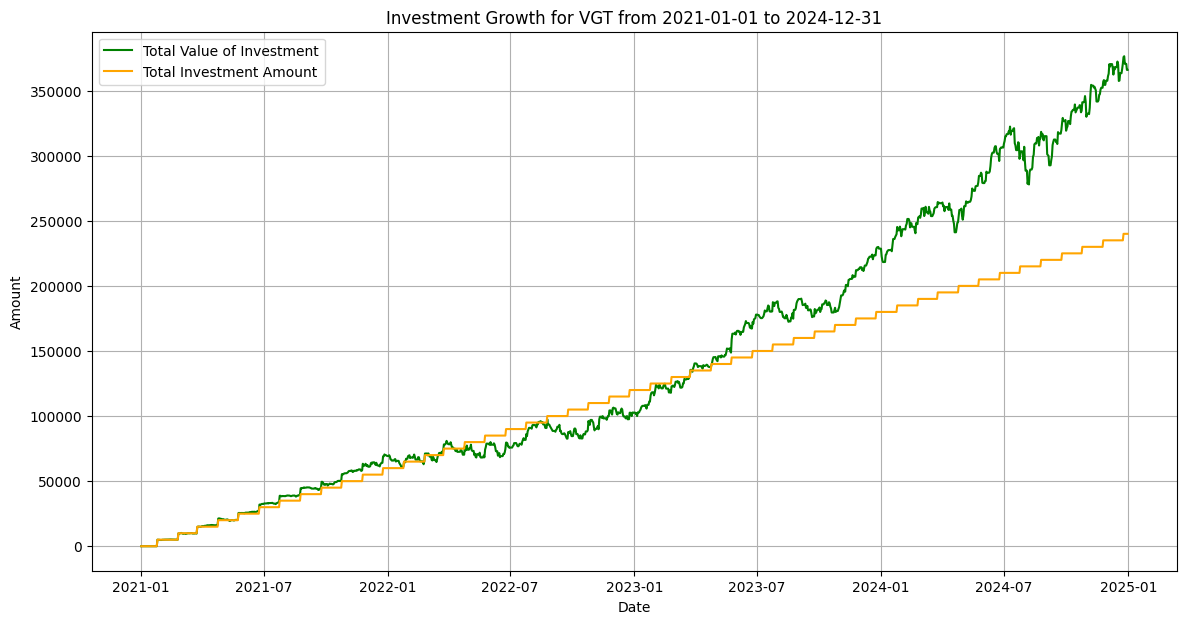

In [88]:
# Visualizing the investment growth vs invested amount
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['total_value'], label='Total Value of Investment', color='green')
plt.plot(stock_data.index, stock_data['total_investment'], label='Total Investment Amount', color='orange')
plt.title(f'Investment Growth for {ticker} from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

In [92]:
# Printing total invested amount
total_invested_amount = stock_data['total_investment'].iloc[-1]
print(f'Total Invested Amount: ${total_invested_amount:.2f}')
# Displaying the final investment value
final_investment_value = stock_data['total_value'].iloc[-1]
print(f'Final Investment Value: ${final_investment_value:.2f}')
# Calculating the total return on investment and %age return
total_return = final_investment_value - total_invested_amount
print(f'Total Return on Investment: ${total_return:.2f}')
percentage_return = (total_return / total_invested_amount) * 100
print(f'Percentage Return on Investment: {percentage_return:.2f}%')
# Calculating CAGR (Compound Annual Growth Rate)
num_years = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365.25
cagr = ((final_investment_value / total_invested_amount) ** (1 / num_years) - 1) * 100
print(f'CAGR (Compound Annual Growth Rate): {cagr:.2f}%')
# Printing # months of investment
num_months = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days // 30
print(f'Number of Months of Investment: {num_months}')

Total Invested Amount: $240000.00
Final Investment Value: $365950.63
Total Return on Investment: $125950.63
Percentage Return on Investment: 52.48%
CAGR (Compound Annual Growth Rate): 11.13%
Number of Months of Investment: 48
